In [1]:
import os 
import numpy as np 
import nibabel as nib 
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns 
import pandas as pd

## Dice overlap for rigid registered images and deformable images: Cases

In [22]:
### Dice scores on the ANTS full run. Rigid, old deform and full run 
output_warp_harmonized = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_ANTS_command_line/harm_ANTS_outputs_exptoinsp_large_images_emphysema_warped"

output_warp_harmonized_files = [file for file in os.listdir(output_warp_harmonized) if not file.endswith("control_Warped.nii.gz")]

output_warp_harmonized_files

subjects_BONE = sorted([file.replace("masked_", "").replace("STANDARD", "BONE").replace("_Warped.nii.gz", ".nii.gz") for file in output_warp_harmonized_files])
subjects_BONE

['COPDGene_A43240_BONE.nii.gz',
 'COPDGene_B05639_BONE.nii.gz',
 'COPDGene_B14644_BONE.nii.gz',
 'COPDGene_B86334_BONE.nii.gz',
 'COPDGene_C64585_BONE.nii.gz',
 'COPDGene_D36309_BONE.nii.gz',
 'COPDGene_D48362_BONE.nii.gz',
 'COPDGene_D70993_BONE.nii.gz',
 'COPDGene_D90444_BONE.nii.gz',
 'COPDGene_E59904_BONE.nii.gz',
 'COPDGene_E69868_BONE.nii.gz',
 'COPDGene_F02607_BONE.nii.gz',
 'COPDGene_F32094_BONE.nii.gz']

In [23]:
emph_bone_harm = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/experiments/insp_exp_run1_results_cycleGAN/harmonized_emphysema_epoch5/emphysema"
emph_rigid_reg = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_ANTS_command_line/harm_rigid_registered_emphysema_masks_warped"
emph_deform_reg = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_ANTS_command_line/ANTS_outputs_exptoinsp_harmonized_emphysema/warped_emphysema_masks"
emph_ANTS_full_reg = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_ANTS_command_line/harm_ANTS_outputs_exptoinsp_large_images_emphysema_warped"

emph_bone_harm_files = sorted([file for file in os.listdir(emph_bone_harm) if file in subjects_BONE])
emph_rigid_reg_files = sorted([file for file in os.listdir(emph_rigid_reg) if file in output_warp_harmonized_files])
emph_deform_reg_files = sorted([file for file in os.listdir(emph_deform_reg) if file in output_warp_harmonized_files])
emph_ANTS_full_reg_files = sorted([file for file in os.listdir(emph_ANTS_full_reg) if file in output_warp_harmonized_files])

In [9]:
emph_bone_harm_files, emph_rigid_reg_files, emph_deform_reg_files, emph_ANTS_full_reg_files

(['COPDGene_A43240_BONE.nii.gz',
  'COPDGene_B05639_BONE.nii.gz',
  'COPDGene_B14644_BONE.nii.gz',
  'COPDGene_B86334_BONE.nii.gz',
  'COPDGene_C64585_BONE.nii.gz',
  'COPDGene_D36309_BONE.nii.gz',
  'COPDGene_D48362_BONE.nii.gz',
  'COPDGene_D70993_BONE.nii.gz',
  'COPDGene_D90444_BONE.nii.gz',
  'COPDGene_E59904_BONE.nii.gz',
  'COPDGene_E69868_BONE.nii.gz',
  'COPDGene_F02607_BONE.nii.gz',
  'COPDGene_F32094_BONE.nii.gz'],
 ['masked_COPDGene_A43240_STANDARD_Warped.nii.gz',
  'masked_COPDGene_B05639_STANDARD_Warped.nii.gz',
  'masked_COPDGene_B14644_STANDARD_Warped.nii.gz',
  'masked_COPDGene_B86334_STANDARD_Warped.nii.gz',
  'masked_COPDGene_C64585_STANDARD_Warped.nii.gz',
  'masked_COPDGene_D36309_STANDARD_Warped.nii.gz',
  'masked_COPDGene_D48362_STANDARD_Warped.nii.gz',
  'masked_COPDGene_D70993_STANDARD_Warped.nii.gz',
  'masked_COPDGene_D90444_STANDARD_Warped.nii.gz',
  'masked_COPDGene_E59904_STANDARD_Warped.nii.gz',
  'masked_COPDGene_E69868_STANDARD_Warped.nii.gz',
  'masked

In [10]:
def dice_overlap(seg1, seg2):
    intersect = np.sum(seg1*seg2)
    fsum = np.sum(seg1)
    ssum = np.sum(seg2)
    dice = (2 * intersect) / (fsum + ssum)
    dice = np.mean(dice)
    dice = np.round(dice,3)
    return dice

dice_overlap_rigid = {}
dice_overlap_deform={}
dice_overlap_full={}

for i in tqdm(range(len(emph_bone_harm_files))):
    bone = nib.load(os.path.join(emph_bone_harm, emph_bone_harm_files[i])).get_fdata()
    rigid = nib.load(os.path.join(emph_rigid_reg, emph_rigid_reg_files[i])).get_fdata()

    bone_dice = dice_overlap(bone, rigid)

    dice_overlap_rigid[emph_bone_harm_files[i]] = bone_dice

for i in tqdm(range(len(emph_bone_harm_files))):
    bone = nib.load(os.path.join(emph_bone_harm, emph_bone_harm_files[i])).get_fdata()
    deform = nib.load(os.path.join(emph_deform_reg, emph_deform_reg_files[i])).get_fdata()

    bone_dice = dice_overlap(bone, deform)

    dice_overlap_deform[emph_bone_harm_files[i]] = bone_dice

for i in tqdm(range(len(emph_bone_harm_files))):
    bone = nib.load(os.path.join(emph_bone_harm, emph_bone_harm_files[i])).get_fdata()
    full = nib.load(os.path.join(emph_ANTS_full_reg, emph_ANTS_full_reg_files[i])).get_fdata()

    bone_dice = dice_overlap(bone, full)

    dice_overlap_full[emph_bone_harm_files[i]] = bone_dice


100%|██████████| 13/13 [00:50<00:00,  3.94s/it]


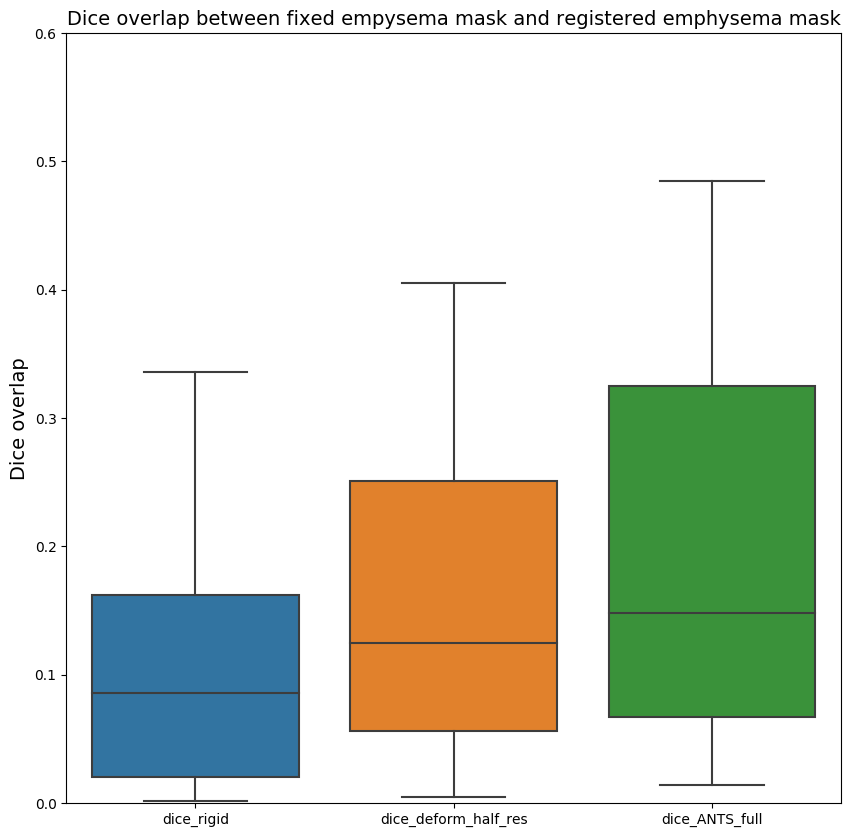

In [15]:
data = {
    'dice_rigid': dice_overlap_rigid,
    'dice_deform_half_res': dice_overlap_deform,
    'dice_ANTS_full': dice_overlap_full
    
}

df = pd.DataFrame(data)

plt.figure(figsize=(10, 10))
sns.boxplot(data=df)
plt.ylabel("Dice overlap", fontsize=14)
plt.ylim(0, 0.6)
plt.title("Dice overlap between fixed empysema mask and registered emphysema mask", fontsize=14)
plt.show()

In [12]:
import scipy.stats as stats
pval_rigid_deform = stats.ttest_rel(dice_overlap_rigid, dice_overlap_deform)
pval_rigid_full = stats.ttest_rel(dice_overlap_rigid, dice_overlap_full)
pval_deform_full = stats.ttest_rel(dice_overlap_deform, dice_overlap_full)

pval_rigid_deform, pval_rigid_full, pval_deform_full


(Ttest_relResult(statistic=-5.909029059820431, pvalue=7.152134377163178e-05),
 Ttest_relResult(statistic=-5.772698151700607, pvalue=8.843025199004285e-05),
 Ttest_relResult(statistic=-5.239271566064988, pvalue=0.0002080269960405082))

## Emphsyema on controls (should be low)

In [16]:
output_warp_harmonized = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_ANTS_command_line/harm_ANTS_outputs_exptoinsp_large_images_emphysema_warped"

output_warp_harmonized_files = [file for file in os.listdir(output_warp_harmonized) if file.endswith("control_Warped.nii.gz")]

output_warp_harmonized_files

subjects_BONE = sorted([file.replace("masked_", "").replace("STANDARD", "BONE").replace("_Warped.nii.gz", ".nii.gz") for file in output_warp_harmonized_files])
subjects_BONE

['COPDGene_A61757_BONE_control.nii.gz',
 'COPDGene_B15777_BONE_control.nii.gz',
 'COPDGene_B17236_BONE_control.nii.gz',
 'COPDGene_B17317_BONE_control.nii.gz',
 'COPDGene_B72303_BONE_control.nii.gz',
 'COPDGene_C05262_BONE_control.nii.gz',
 'COPDGene_C19536_BONE_control.nii.gz',
 'COPDGene_C40785_BONE_control.nii.gz',
 'COPDGene_C53764_BONE_control.nii.gz',
 'COPDGene_C64141_BONE_control.nii.gz',
 'COPDGene_C64303_BONE_control.nii.gz',
 'COPDGene_C73437_BONE_control.nii.gz',
 'COPDGene_D32260_BONE_control.nii.gz',
 'COPDGene_D41724_BONE_control.nii.gz',
 'COPDGene_D80990_BONE_control.nii.gz',
 'COPDGene_E73754_BONE_control.nii.gz',
 'COPDGene_F56917_BONE_control.nii.gz']

In [17]:
emph_bone_harm = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/experiments/insp_exp_run1_results_cycleGAN/harmonized_emphysema_epoch5/emphysema"
emph_rigid_reg = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_ANTS_command_line/harm_rigid_registered_emphysema_masks_warped"
emph_deform_reg = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_ANTS_command_line/ANTS_outputs_exptoinsp_harmonized_emphysema/warped_emphysema_masks"
emph_ANTS_full_reg = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_ANTS_command_line/harm_ANTS_outputs_exptoinsp_large_images_emphysema_warped"

emph_bone_harm_files = sorted([file for file in os.listdir(emph_bone_harm) if file in subjects_BONE])
emph_rigid_reg_files = sorted([file for file in os.listdir(emph_rigid_reg) if file in output_warp_harmonized_files])
emph_deform_reg_files = sorted([file for file in os.listdir(emph_deform_reg) if file in output_warp_harmonized_files])
emph_ANTS_full_reg_files = sorted([file for file in os.listdir(emph_ANTS_full_reg) if file in output_warp_harmonized_files])

In [18]:
def dice_overlap(seg1, seg2):
    intersect = np.sum(seg1*seg2)
    fsum = np.sum(seg1)
    ssum = np.sum(seg2)
    dice = (2 * intersect) / (fsum + ssum)
    dice = np.mean(dice)
    dice = np.round(dice,3)
    return dice

dice_overlap_rigid = {}
dice_overlap_deform={}
dice_overlap_full={}

for i in tqdm(range(len(emph_bone_harm_files))):
    bone = nib.load(os.path.join(emph_bone_harm, emph_bone_harm_files[i])).get_fdata()
    rigid = nib.load(os.path.join(emph_rigid_reg, emph_rigid_reg_files[i])).get_fdata()

    bone_dice = dice_overlap(bone, rigid)

    dice_overlap_rigid[emph_bone_harm_files[i]] = bone_dice

for i in tqdm(range(len(emph_bone_harm_files))):
    bone = nib.load(os.path.join(emph_bone_harm, emph_bone_harm_files[i])).get_fdata()
    deform = nib.load(os.path.join(emph_deform_reg, emph_deform_reg_files[i])).get_fdata()

    bone_dice = dice_overlap(bone, deform)

    dice_overlap_deform[emph_bone_harm_files[i]] = bone_dice

for i in tqdm(range(len(emph_bone_harm_files))):
    bone = nib.load(os.path.join(emph_bone_harm, emph_bone_harm_files[i])).get_fdata()
    full = nib.load(os.path.join(emph_ANTS_full_reg, emph_ANTS_full_reg_files[i])).get_fdata()

    bone_dice = dice_overlap(bone, full)

    dice_overlap_full[emph_bone_harm_files[i]] = bone_dice

100%|██████████| 17/17 [01:06<00:00,  4.20s/it]


In [19]:
sorted(dice_overlap_full)

['COPDGene_A61757_BONE_control.nii.gz',
 'COPDGene_B15777_BONE_control.nii.gz',
 'COPDGene_B17236_BONE_control.nii.gz',
 'COPDGene_B17317_BONE_control.nii.gz',
 'COPDGene_B72303_BONE_control.nii.gz',
 'COPDGene_C05262_BONE_control.nii.gz',
 'COPDGene_C19536_BONE_control.nii.gz',
 'COPDGene_C40785_BONE_control.nii.gz',
 'COPDGene_C53764_BONE_control.nii.gz',
 'COPDGene_C64141_BONE_control.nii.gz',
 'COPDGene_C64303_BONE_control.nii.gz',
 'COPDGene_C73437_BONE_control.nii.gz',
 'COPDGene_D32260_BONE_control.nii.gz',
 'COPDGene_D41724_BONE_control.nii.gz',
 'COPDGene_D80990_BONE_control.nii.gz',
 'COPDGene_E73754_BONE_control.nii.gz',
 'COPDGene_F56917_BONE_control.nii.gz']

In [20]:
dice_overlap_full

{'COPDGene_A61757_BONE_control.nii.gz': 0.01,
 'COPDGene_B15777_BONE_control.nii.gz': 0.06,
 'COPDGene_B17236_BONE_control.nii.gz': 0.057,
 'COPDGene_B17317_BONE_control.nii.gz': 0.137,
 'COPDGene_B72303_BONE_control.nii.gz': 0.011,
 'COPDGene_C05262_BONE_control.nii.gz': 0.023,
 'COPDGene_C19536_BONE_control.nii.gz': 0.042,
 'COPDGene_C40785_BONE_control.nii.gz': 0.054,
 'COPDGene_C53764_BONE_control.nii.gz': 0.061,
 'COPDGene_C64141_BONE_control.nii.gz': 0.033,
 'COPDGene_C64303_BONE_control.nii.gz': 0.031,
 'COPDGene_C73437_BONE_control.nii.gz': 0.046,
 'COPDGene_D32260_BONE_control.nii.gz': 0.125,
 'COPDGene_D41724_BONE_control.nii.gz': 0.018,
 'COPDGene_D80990_BONE_control.nii.gz': 0.024,
 'COPDGene_E73754_BONE_control.nii.gz': 0.017,
 'COPDGene_F56917_BONE_control.nii.gz': 0.014}

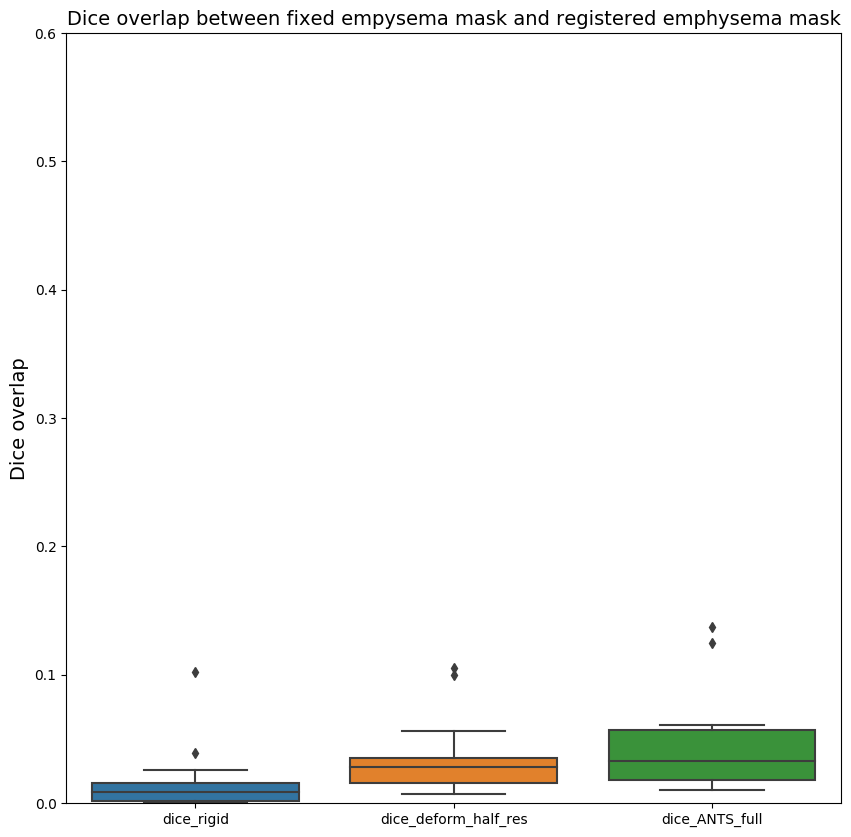

In [21]:
data = {
    'dice_rigid': dice_overlap_rigid.values(),
    'dice_deform_half_res': dice_overlap_deform.values(),
    'dice_ANTS_full': dice_overlap_full.values()
    
}

df = pd.DataFrame(data)

plt.figure(figsize=(10, 10))
sns.boxplot(data=df)
plt.ylabel("Dice overlap", fontsize=14)
plt.ylim(0, 0.6)
plt.title("Dice overlap between fixed empysema mask and registered emphysema mask", fontsize=14)
plt.show()